In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("behrad3d/nasa-cmaps")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nasa-cmaps


In [65]:

from google.colab import files
files.upload()  # Upload kaggle.json when prompted


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aishwaryas2305","key":"9c862b892daa964be858f89057b80c73"}'}

In [66]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [67]:
!pip install -q kaggle


In [68]:
!kaggle datasets download -d behrad3d/nasa-cmaps


Dataset URL: https://www.kaggle.com/datasets/behrad3d/nasa-cmaps
License(s): CC0-1.0
nasa-cmaps.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
!unzip -q nasa-cmaps.zip -d nasa_cmaps


replace nasa_cmaps/CMaps/Damage Propagation Modeling.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/RUL_FD001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/RUL_FD002.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/RUL_FD003.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/RUL_FD004.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/test_FD001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/test_FD002.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: yyyyyyyyyyyyyy
replace nasa_cmaps/CMaps/test_FD003.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace nasa_cmaps/CMaps/test_FD004.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/train_FD001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace nasa_cmaps/CMaps/train_FD002.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:

In [70]:
!ls nasa_cmaps


CMaps


In [71]:
import pandas as pd
import numpy as np

In [72]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2',
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]

In [73]:
train = pd.read_csv("/content/nasa_cmaps/CMaps/train_FD001.txt", sep = ' ' , header=None , names=column_names ,index_col=False )
test = pd.read_csv("/content/nasa_cmaps/CMaps/test_FD001.txt", sep = ' ' , header=None , names=column_names ,index_col=False)
RUL = pd.read_csv("/content/nasa_cmaps/CMaps/RUL_FD001.txt",sep = ' ' , header=None  ,names=["RUL"], index_col=False)

<ipython-input-73-1bae09ce71e7>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train = pd.read_csv("/content/nasa_cmaps/CMaps/train_FD001.txt", sep = ' ' , header=None , names=column_names ,index_col=False )
<ipython-input-73-1bae09ce71e7>:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test = pd.read_csv("/content/nasa_cmaps/CMaps/test_FD001.txt", sep = ' ' , header=None , names=column_names ,index_col=False)


In [74]:
train

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [75]:
min(train['engine'].value_counts().sort_index().values)


np.int64(128)

In [76]:
rul_df = train.groupby('engine')['time'].max().reset_index()
rul_df

,engine,time
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [77]:
rul_df.columns = ['engine', 'max_cycle']
train = train.merge(rul_df, on='engine', how='left')
train['RUL'] = train['max_cycle'] - train['time']
train.drop(columns=['max_cycle'], inplace=True)

In [78]:
train

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [79]:
test

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [80]:
rul_df = test.groupby('engine')['time'].max().reset_index()
rul_df

,engine,time
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98
...,...,...
95,96,97
96,97,134
97,98,121
98,99,97


In [81]:
rul_df.columns = ['engine', 'max_cycle']
test = test.merge(rul_df, on='engine', how='left')
test['RUL'] = test['max_cycle'] - test['time']
test.drop(columns=['max_cycle'], inplace=True)

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine        13096 non-null  int64  
 1   time          13096 non-null  int64  
 2   op_setting_1  13096 non-null  float64
 3   op_setting_2  13096 non-null  float64
 4   op_setting_3  13096 non-null  float64
 5   sm_1          13096 non-null  float64
 6   sm_2          13096 non-null  float64
 7   sm_3          13096 non-null  float64
 8   sm_4          13096 non-null  float64
 9   sm_5          13096 non-null  float64
 10  sm_6          13096 non-null  float64
 11  sm_7          13096 non-null  float64
 12  sm_8          13096 non-null  float64
 13  sm_9          13096 non-null  float64
 14  sm_10         13096 non-null  float64
 15  sm_11         13096 non-null  float64
 16  sm_12         13096 non-null  float64
 17  sm_13         13096 non-null  float64
 18  sm_14         13096 non-nu

In [83]:
RUL

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [84]:
RUL['engine'] = RUL.index + 1
RUL

,RUL,engine
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [85]:
test = test.merge(RUL, on='engine', how='left')
test

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL_x,RUL_y
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,30,112
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,29,112
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,28,112
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,27,112
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,26,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,4,20
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,3,20
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,2,20
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,1,20


In [86]:
test['RUL'] = test['RUL_x'] + test['RUL_y']
test.drop(columns=['RUL_x','RUL_y'], inplace=True)
test

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,21


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine        20631 non-null  int64  
 1   time          20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sm_1          20631 non-null  float64
 6   sm_2          20631 non-null  float64
 7   sm_3          20631 non-null  float64
 8   sm_4          20631 non-null  float64
 9   sm_5          20631 non-null  float64
 10  sm_6          20631 non-null  float64
 11  sm_7          20631 non-null  float64
 12  sm_8          20631 non-null  float64
 13  sm_9          20631 non-null  float64
 14  sm_10         20631 non-null  float64
 15  sm_11         20631 non-null  float64
 16  sm_12         20631 non-null  float64
 17  sm_13         20631 non-null  float64
 18  sm_14         20631 non-nu

In [88]:
train.describe()

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


## Standard deviation

In [89]:
# Drop columns with zero standard deviation
cols_to_drop = train.std(numeric_only=True)[train.std(numeric_only=True) == 0].index
cols_to_drop

Index(['op_setting_3', 'sm_18', 'sm_19'], dtype='object')

In [90]:
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [91]:
train.isnull().sum()

,0
engine,0
time,0
op_setting_1,0
op_setting_2,0
sm_1,0
sm_2,0
sm_3,0
sm_4,0
sm_5,0
sm_6,0


In [92]:
train.duplicated().sum()

np.int64(0)

#Check for constant or quasi-constant columns

In [93]:
cols_to_drop = []
for col in train.columns:
    top_freq = train[col].value_counts(normalize=True).values[0]
    if top_freq > 0.99:
        print(f"{col} is quasi-constant with {top_freq*100:.2f}% same value")
        cols_to_drop.append(col)


sm_1 is quasi-constant with 100.00% same value
sm_5 is quasi-constant with 100.00% same value
sm_10 is quasi-constant with 100.00% same value
sm_16 is quasi-constant with 100.00% same value


In [94]:
cols_to_drop

['sm_1', 'sm_5', 'sm_10', 'sm_16']

In [95]:

# train = train.drop(columns=cols_to_drop)
# test = test.drop(columns=cols_to_drop)

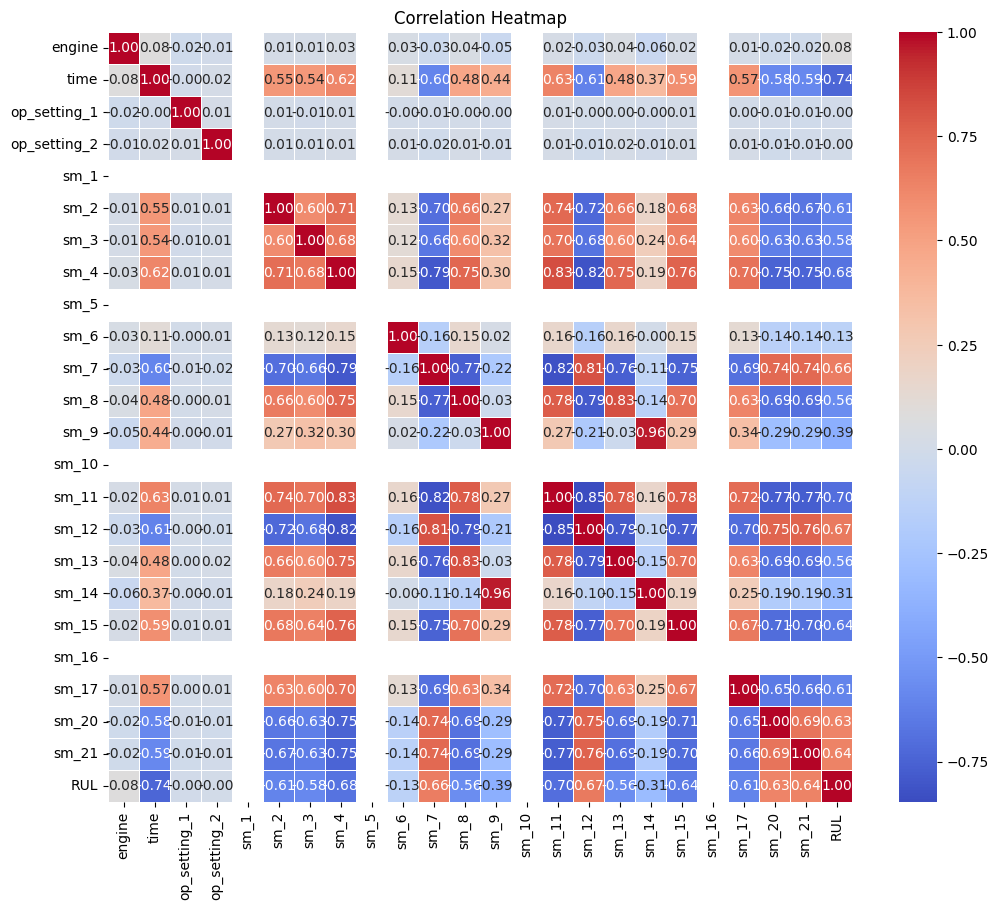

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = train.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and show plot
plt.title('Correlation Heatmap')
plt.show()


In [97]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = train.corr(numeric_only=True)

# Set the correlation threshold
threshold = 0.95

# Find pairs of highly correlated features
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print highly correlated pairs
for pair in high_corr_pairs:
    print(f"Pair: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}")

# Drop one feature from each pair
# We can drop the second feature from each pair to simplify
cols_to_drop = [pair[1] for pair in high_corr_pairs]

# Drop the selected features from the training set
# train = train.drop(columns=cols_to_drop)

print(f"Dropped columns: {cols_to_drop}")


Pair: sm_14 and sm_9 | Correlation: 0.96
Dropped columns: ['sm_9']


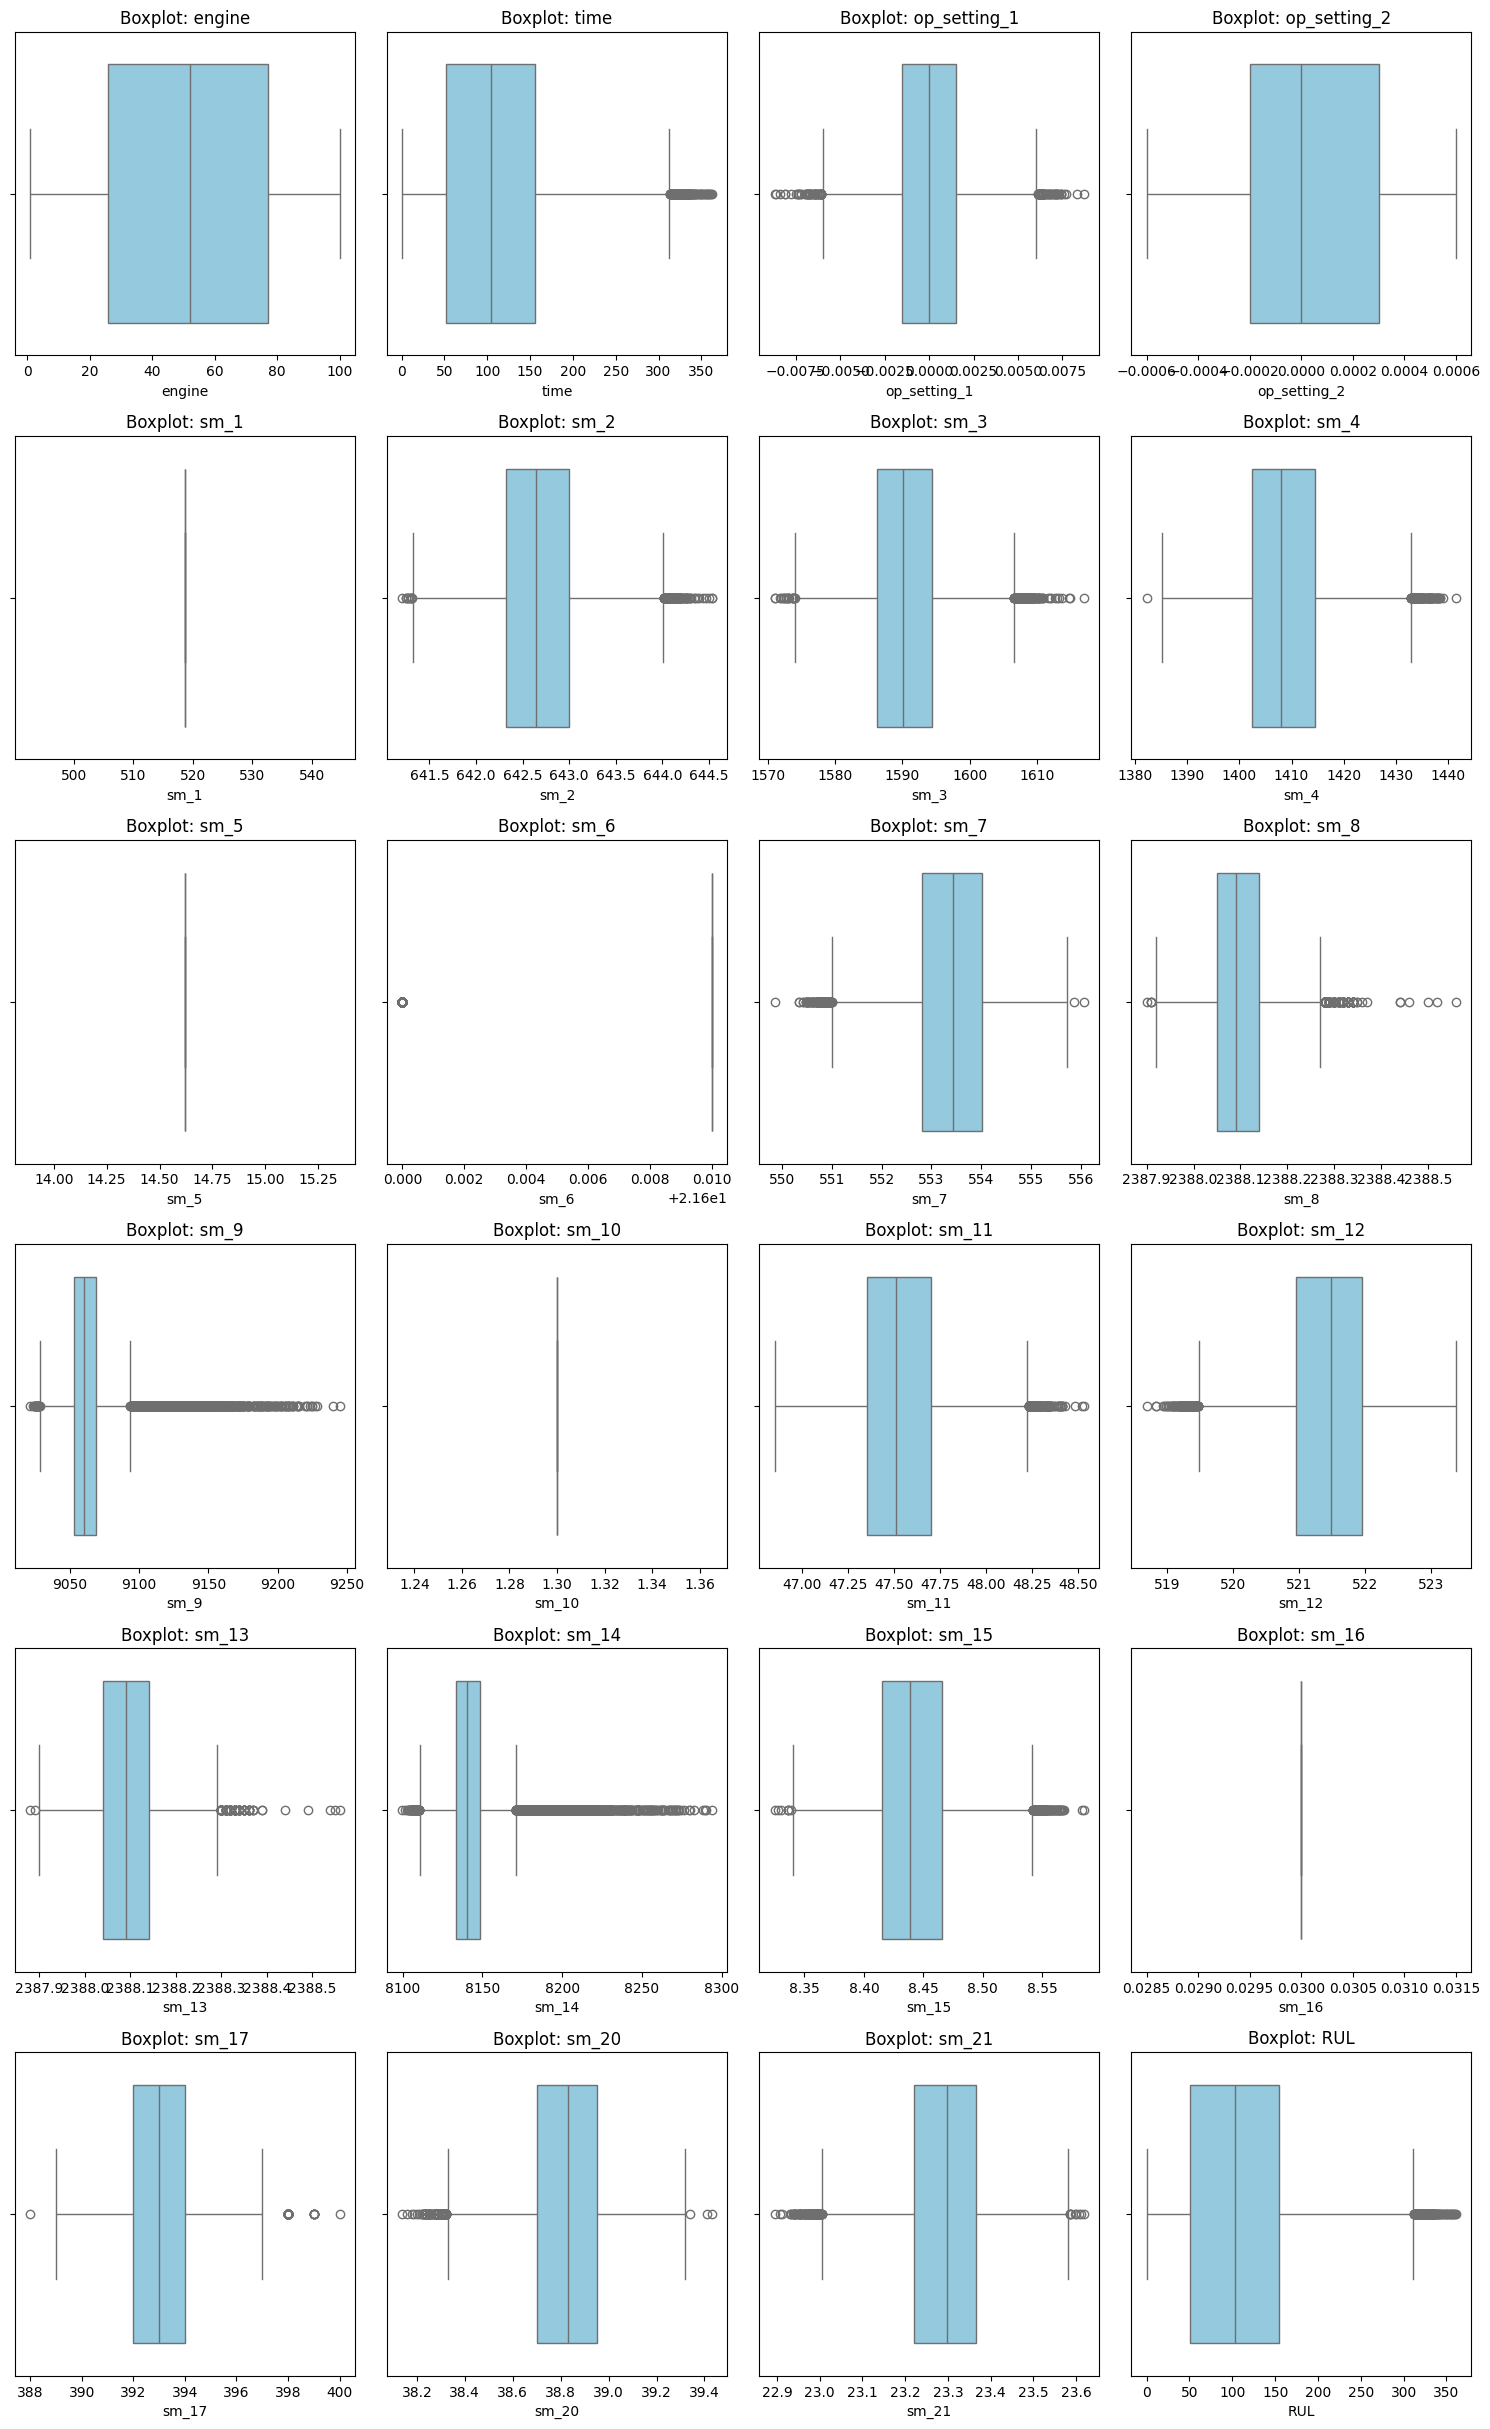

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the number of features
num_features = train.shape[1]

# Set the plot size based on the number of features
rows = (num_features // 4) + 1  # Adjust number of rows based on the number of columns
plt.figure(figsize=(15, rows * 4))  # Adjust the height based on rows

# Loop through each numerical column in the dataset
for i, col in enumerate(train.select_dtypes(include=[np.number]).columns):
    plt.subplot(rows, 4, i + 1)  # Adjust the grid size if needed
    sns.boxplot(x=train[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.show()


In [99]:
# Calculate the IQR for each feature
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for each feature
outliers = ((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR)))

# Calculate the percentage of outliers for each feature
outlier_percentage = outliers.mean() * 100

# Print the percentage of outliers for each feature
print("Percentage of outliers per feature:")
print(outlier_percentage)

# Features with more than 50% outliers
features_to_remove = outlier_percentage[outlier_percentage > 50].index

Percentage of outliers per feature:
engine          0.000000
time            0.504096
op_setting_1    0.508943
op_setting_2    0.000000
sm_1            0.000000
sm_2            0.620426
sm_3            0.799767
sm_4            0.581649
sm_5            0.000000
sm_6            1.967912
sm_7            0.533178
sm_8            1.551064
sm_9            8.172168
sm_10           0.000000
sm_11           0.809461
sm_12           0.707673
sm_13           0.780379
sm_14           7.479036
sm_15           0.581649
sm_16           0.000000
sm_17           0.392613
sm_20           0.567108
sm_21           0.659202
RUL             0.504096
dtype: float64


In [100]:
features_to_remove

Index([], dtype='object')

In [101]:
train

,engine,time,op_setting_1,op_setting_2,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_11,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_20,sm_21,RUL
0,1,1,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,518.67,642.35,1587.99,1404.20,14.62,21.61,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,518.67,642.35,1582.79,1401.87,14.62,21.61,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,518.67,642.37,1582.85,1406.22,14.62,21.61,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,518.67,643.49,1597.98,1428.63,14.62,21.61,...,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,518.67,643.54,1604.50,1433.58,14.62,21.61,...,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,518.67,643.42,1602.46,1428.18,14.62,21.61,...,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,518.67,643.23,1605.26,1426.53,14.62,21.61,...,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,38.29,23.0640,1


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine        20631 non-null  int64  
 1   time          20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   sm_1          20631 non-null  float64
 5   sm_2          20631 non-null  float64
 6   sm_3          20631 non-null  float64
 7   sm_4          20631 non-null  float64
 8   sm_5          20631 non-null  float64
 9   sm_6          20631 non-null  float64
 10  sm_7          20631 non-null  float64
 11  sm_8          20631 non-null  float64
 12  sm_9          20631 non-null  float64
 13  sm_10         20631 non-null  float64
 14  sm_11         20631 non-null  float64
 15  sm_12         20631 non-null  float64
 16  sm_13         20631 non-null  float64
 17  sm_14         20631 non-null  float64
 18  sm_15         20631 non-nu

In [103]:
test

,engine,time,op_setting_1,op_setting_2,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_11,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,518.67,643.02,1585.29,1398.21,14.62,21.61,...,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,518.67,641.71,1588.45,1395.42,14.62,21.61,...,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,518.67,642.46,1586.94,1401.34,14.62,21.61,...,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,518.67,642.44,1584.12,1406.42,14.62,21.61,...,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,518.67,642.51,1587.19,1401.92,14.62,21.61,...,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,518.67,643.24,1599.45,1415.79,14.62,21.61,...,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,518.67,643.22,1595.69,1422.05,14.62,21.61,...,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,518.67,643.44,1593.15,1406.82,14.62,21.61,...,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,518.67,643.26,1594.99,1419.36,14.62,21.61,...,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,38.66,23.2699,21


In [104]:
prefixes = ['op_setting_', 'sm_']

# Dynamically select columns starting with specified prefixes, plus 'time'
selected_columns = [col for col in train.columns if any(col.startswith(p) for p in prefixes)]
selected_columns

['op_setting_1',
 'op_setting_2',
 'sm_1',
 'sm_2',
 'sm_3',
 'sm_4',
 'sm_5',
 'sm_6',
 'sm_7',
 'sm_8',
 'sm_9',
 'sm_10',
 'sm_11',
 'sm_12',
 'sm_13',
 'sm_14',
 'sm_15',
 'sm_16',
 'sm_17',
 'sm_20',
 'sm_21']

In [105]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame

# Sort data by engine and time
train = train.sort_values(by=['engine', 'time'])

# Group by engine
grouped = train.groupby('engine')

# Prepare data for LSTM (sliding window approach)
sequence_length = 100  # Length of each sequence
X = []
y = []
prefixes = ['op_setting_', 'sm_']

# Dynamically select columns starting with specified prefixes, plus 'time'
selected_columns = [col for col in train.columns if any(col.startswith(p) for p in prefixes)]

for engine_id, group in grouped:
    for i in range(len(group) - sequence_length):
        # Get sequence (features)
        sequence = group.iloc[i:i+sequence_length][selected_columns].values
        # Get corresponding RUL (target)
        rul = group.iloc[i+sequence_length-1]['RUL']

        # Append to the X and y lists
        X.append(sequence)
        y.append(rul)


# Convert to numpy arrays
X_train = np.array(X)
y_train = np.array(y)

# Scale features
scaler = MinMaxScaler()
X_train = X_train.reshape(-1, X_train.shape[-1])  # Flatten the data for scaling
X_train = scaler.fit_transform(X_train)
X_train = X_train.reshape(-1, sequence_length, X_train.shape[-1])  # Reshape back for LSTM (samples, time_steps, features)

# Split into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now X_train, y_train, X_test, y_test are ready for LSTM model


In [106]:
test

,engine,time,op_setting_1,op_setting_2,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_11,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,518.67,643.02,1585.29,1398.21,14.62,21.61,...,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,518.67,641.71,1588.45,1395.42,14.62,21.61,...,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,518.67,642.46,1586.94,1401.34,14.62,21.61,...,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,518.67,642.44,1584.12,1406.42,14.62,21.61,...,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,518.67,642.51,1587.19,1401.92,14.62,21.61,...,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,518.67,643.24,1599.45,1415.79,14.62,21.61,...,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,518.67,643.22,1595.69,1422.05,14.62,21.61,...,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,518.67,643.44,1593.15,1406.82,14.62,21.61,...,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,518.67,643.26,1594.99,1419.36,14.62,21.61,...,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,38.66,23.2699,21


In [107]:

test = test.sort_values(by=['engine', 'time'])

# Group by engine
grouped = test.groupby('engine')

# Prepare data for LSTM (sliding window approach)
sequence_length = 100  # Length of each sequence
X = []
y = []



print(selected_columns)
for engine_id, group in grouped:
    if len(group) >= sequence_length:
        sequence = group.iloc[-sequence_length:][selected_columns].values
        rul = group.iloc[-1]['RUL']
        print(rul)
        # Append to the X and y lists
        X.append(sequence)
        y.append(rul)

# Convert to numpy arrays
X_test = np.array(X)
y_test = np.array(y)

X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
print(X_test_reshaped.shape)
print(X_test_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)
X_test = X_test_scaled.reshape(-1, sequence_length, X_test.shape[-1])

# Split into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now X_train, y_train, X_test, y_test are ready for LSTM model


['op_setting_1', 'op_setting_2', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_20', 'sm_21']
69.0
82.0
93.0
91.0
95.0
96.0
124.0
95.0
84.0
50.0
28.0
87.0
16.0
57.0
113.0
20.0
66.0
97.0
90.0
115.0
8.0
48.0
7.0
11.0
19.0
21.0
50.0
28.0
18.0
10.0
59.0
114.0
47.0
21.0
114.0
29.0
26.0
97.0
137.0
15.0
103.0
37.0
100.0
21.0
54.0
72.0
28.0
14.0
8.0
94.0
50.0
131.0
126.0
10.0
34.0
63.0
90.0
8.0
9.0
58.0
89.0
136.0
28.0
38.0
20.0
85.0
55.0
82.0
59.0
20.0
(7000, 21)
[[ 1.80000e-03  1.00000e-04  5.18670e+02 ...  3.93000e+02  3.90600e+01
   2.32117e+01]
 [-1.90000e-03  4.00000e-04  5.18670e+02 ...  3.93000e+02  3.89700e+01
   2.33014e+01]
 [ 7.00000e-04 -3.00000e-04  5.18670e+02 ...  3.94000e+02  3.87900e+01
   2.34114e+01]
 ...
 [-6.00000e-04 -3.00000e-04  5.18670e+02 ...  3.95000e+02  3.86200e+01
   2.32051e+01]
 [-3.80000e-03  1.00000e-04  5.18670e+02 ...  3.95000e+02  3.86600e+01
   2.32699e+01

In [108]:
y_train

array([92., 91., 90., ...,  3.,  2.,  1.])

In [109]:
X_train[17][0]

array([0.32183908, 0.41666667, 0.        , 0.4246988 , 0.43601482,
       0.24653395, 0.        , 1.        , 0.70048309, 0.26785714,
       0.13579343, 0.        , 0.2208589 , 0.65458422, 0.31147541,
       0.17411852, 0.29973067, 0.        , 0.33333333, 0.58139535,
       0.69663076])

In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10631, 100, 21)
(10631,)
(70, 100, 21)
(70,)


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history  = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    shuffle=False
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 4176.7529 - val_loss: 5197.0786
Epoch 2/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 2538.6819 - val_loss: 4205.1533
Epoch 3/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 2040.3970 - val_loss: 3749.8491
Epoch 4/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1874.4380 - val_loss: 3538.6951
Epoch 5/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1819.1512 - val_loss: 3441.7532
Epoch 6/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1802.4838 - val_loss: 3393.8560
Epoch 7/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1799.1677 - val_loss: 3370.5278
Epoch 8/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1792.3286 - val_loss: 3358.0452
Epoch 9/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1794.3506 - val_loss: 3351.8889
Epoch 10/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 1796.0688 - val_loss: 3350.4004
Epoch 11/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - 

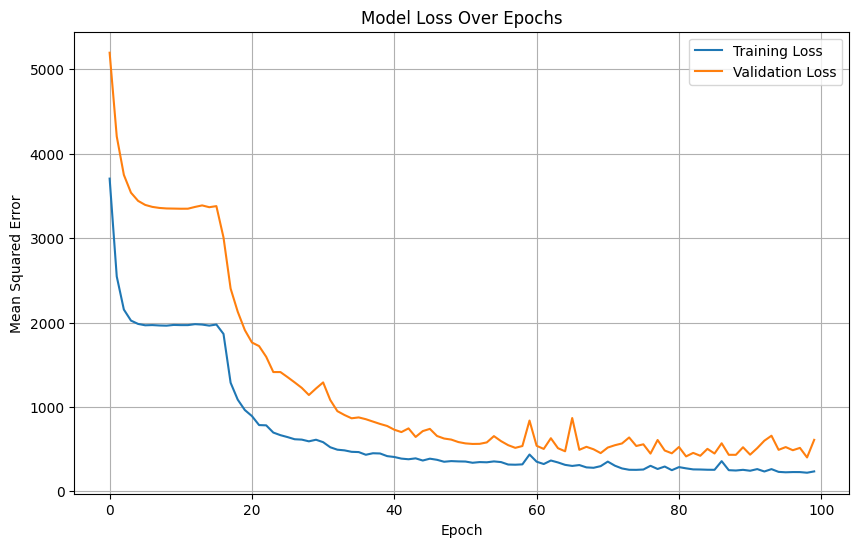

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
y_test

array([ 69.,  82.,  93.,  91.,  95.,  96., 124.,  95.,  84.,  50.,  28.,
        87.,  16.,  57., 113.,  20.,  66.,  97.,  90., 115.,   8.,  48.,
         7.,  11.,  19.,  21.,  50.,  28.,  18.,  10.,  59., 114.,  47.,
        21., 114.,  29.,  26.,  97., 137.,  15., 103.,  37., 100.,  21.,
        54.,  72.,  28.,  14.,   8.,  94.,  50., 131., 126.,  10.,  34.,
        63.,  90.,   8.,   9.,  58.,  89., 136.,  28.,  38.,  20.,  85.,
        55.,  82.,  59.,  20.])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 205.4678
Test Loss (MSE): 195.79733276367188
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


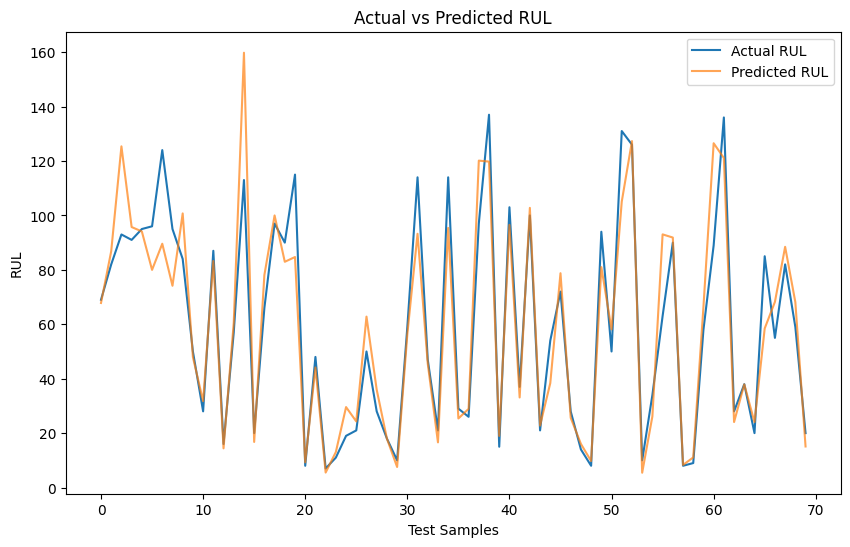

In [114]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Predict the RUL on the test set
y_pred = model.predict(X_test)

# Plot the actual vs predicted RUL values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Test Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()


In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


RMSE: 13.992759714798826
MAE: 9.447977195467267


## Attention

In [116]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention, Concatenate

# Input shape: (time_steps, features)
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# First LSTM layer (return sequences for attention)
lstm1 = LSTM(50, return_sequences=True)(input_layer)
drop1 = Dropout(0.2)(lstm1)

# Attention layer
# Query = drop1, Value = drop1
attention = Attention()([drop1, drop1])

# Concatenate LSTM output + Attention context
concat = Concatenate()([drop1, attention])

# Second LSTM layer
lstm2 = LSTM(50)(concat)
drop2 = Dropout(0.2)(lstm2)

# Output layer
output = Dense(1)(drop2)

# Build and compile the model
att_model = Model(inputs=input_layer, outputs=output)
att_model.compile(optimizer='adam', loss='mean_squared_error')

# Print summary
att_model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 100, 21)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 100, 50)   │     14,400 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 100, 50)   │          0 │ lstm_8[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 100, 50)   │          0 │ dropout_10[0][0], │
│ (Attention)         │                   │            │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 100, 100)  │          0 │ dropout_10[0][0], │
│ (Concatenate)       │                   │            │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 50)        │     30,200 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 50)        │          0 │ lstm_9[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         51 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 44,651 (174.42 KB)

 Trainable params: 44,651 (174.42 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
history_att = att_model.fit(X_train, y_train,
                            epochs=100,
                            batch_size=16,
                            validation_split=0.2,
                            shuffle=False,
                            verbose=1)

Epoch 1/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 4159.6680 - val_loss: 5292.1328
Epoch 2/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 2602.0730 - val_loss: 4240.9839
Epoch 3/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 2058.8516 - val_loss: 3766.2288
Epoch 4/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1875.0917 - val_loss: 3547.8149
Epoch 5/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 1814.8643 - val_loss: 3446.7942
Epoch 6/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1800.5873 - val_loss: 3396.9878
Epoch 7/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1807.1708 - val_loss: 3373.4673
Epoch 8/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1786.6798 - val_loss: 3360.0715
Epoch 9/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1792.2313 - val_loss: 3352.9062
Epoch 10/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1788.0419 - val_loss: 3350.5662
Epoch 11/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step 

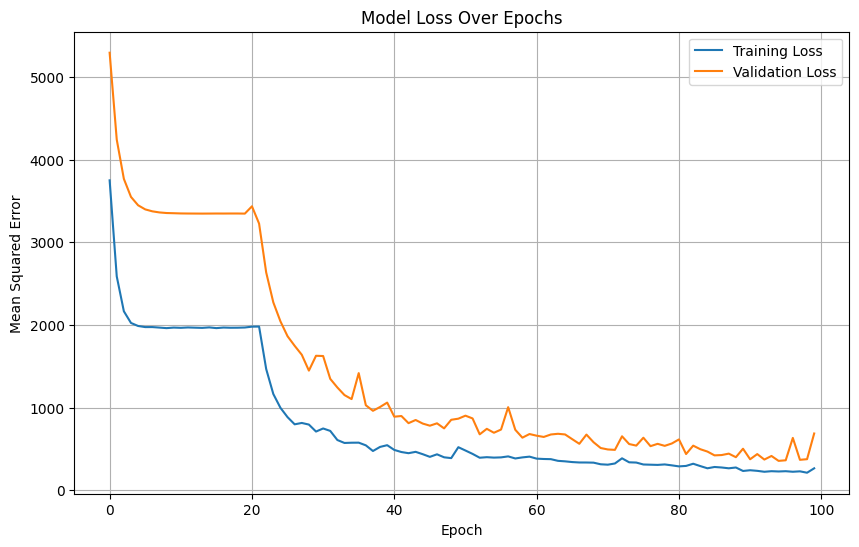

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(history_att.history['loss'], label='Training Loss')
plt.plot(history_att.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 226.3826
Test Loss (MSE): 207.8743896484375
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


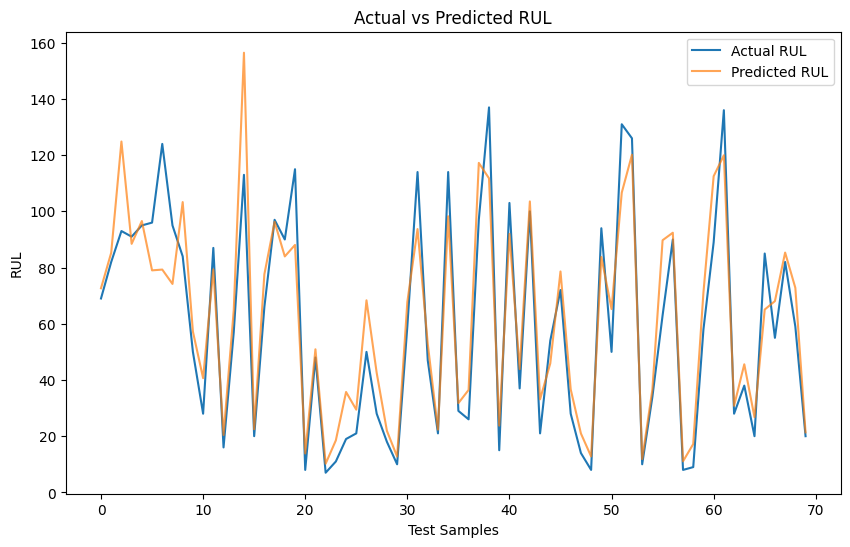

In [119]:
# Evaluate the model on the test set
test_loss = att_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Predict the RUL on the test set
y_pred = att_model.predict(X_test)

# Plot the actual vs predicted RUL values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Test Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()


In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


RMSE: 14.41784957750814
MAE: 11.000009087153844


In [121]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D

# Input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Bidirectional LSTM
x = Bidirectional(LSTM(50, return_sequences=True))(input_layer)
x = Dropout(0.2)(x)

# Multi-head attention layer
attn_output = MultiHeadAttention(num_heads=2, key_dim=64)(x, x)
attn_output = Dropout(0.1)(attn_output)
attn_output = LayerNormalization(epsilon=1e-6)(x + attn_output)  # Residual connection

# Optional: Add another BiLSTM after attention
x = Bidirectional(LSTM(50, return_sequences=True))(attn_output)
x = Dropout(0.2)(x)

# Global Average Pooling
x = GlobalAveragePooling1D()(x)

# Final output layer
output = Dense(1)(x)

# Define and compile the model
model_bi_attn = Model(inputs=input_layer, outputs=output)
model_bi_attn.compile(optimizer='adam', loss='mean_squared_error')




In [122]:
# Train the model
history = model_bi_attn.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    shuffle=False,
    verbose=1
)

Epoch 1/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - loss: 3608.6187 - val_loss: 4066.5322
Epoch 2/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 1947.0281 - val_loss: 3489.8523
Epoch 3/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 1805.4220 - val_loss: 3380.8396
Epoch 4/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 1778.0503 - val_loss: 3338.6128
Epoch 5/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 1777.2933 - val_loss: 3326.9968
Epoch 6/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - loss: 1777.6565 - val_loss: 3323.6868
Epoch 7/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 1777.7438 - val_loss: 3322.9089
Epoch 8/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 1777.2748 - val_loss: 3322.5464
Epoch 9/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 1777.5627 - val_loss: 3322.4639
Epoch 10/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 1777.7070 - val_loss: 3322.5469
Epoch 11/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 11s 21m

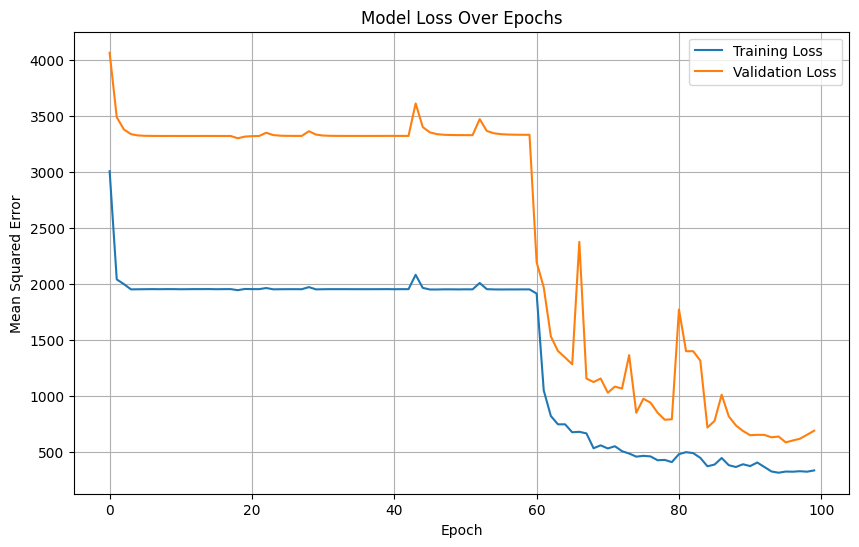

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 246.1971
Test Loss (MSE): 247.01316833496094
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step


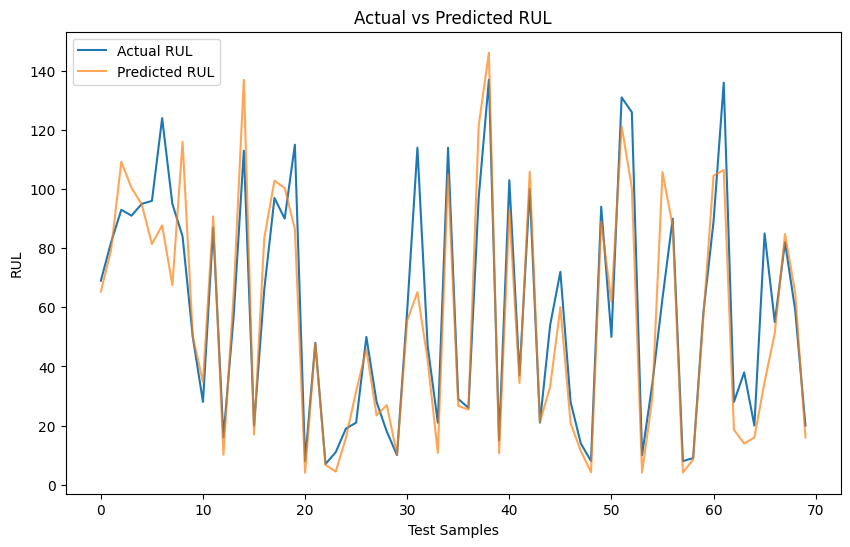

In [124]:
# Evaluate the model on the test set
test_loss = model_bi_attn.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

# Predict the RUL on the test set
y_pred = model_bi_attn.predict(X_test)

# Plot the actual vs predicted RUL values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Test Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()


In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


RMSE: 15.716652569707293
MAE: 10.62259065083095
